In [5]:
%%javascript
Jupyter.keyboard_manager.command_shortcuts.add_shortcut('f5', {
    
    help : 'run cell',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;
        
    }}                                               
);
Jupyter.keyboard_manager.command_shortcuts.add_shortcut('ctrl-.', {
    help : 'run cell',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;
        
    }}                                               
);

<IPython.core.display.Javascript object>

In [20]:
import numpy as np
from numpy import linalg as LA

self_X_train = np.random.random([50, 11743])
X_test = np.random.random([30, 11743])



print(self_X_train)



print(X)

def time_function(f, *args):
  """
  Call a function f with args and return the time (in seconds) that it took to execute.
  """
  import time
  tic = time.time()
  f(*args)
    
  toc = time.time()
  return toc - tic



[[ 0.80199551  0.64402801  0.56276916 ...,  0.94983083  0.91405496
   0.19359006]
 [ 0.58364727  0.77539071  0.4930819  ...,  0.79116004  0.62868395
   0.48129595]
 [ 0.92238044  0.39239338  0.1482598  ...,  0.4621881   0.89998573
   0.49456596]
 ..., 
 [ 0.23781538  0.72672502  0.97524244 ...,  0.03311774  0.74468713
   0.22768607]
 [ 0.80997837  0.84749339  0.36306339 ...,  0.95278288  0.30783989
   0.2082002 ]
 [ 0.31960902  0.97933823  0.23342779 ...,  0.82995956  0.31785668
   0.7566649 ]]
[[ 0.86408955  0.55238692  0.79911241  0.97384357  0.74128583  0.24842435
   0.73966237  0.54588246  0.40003796  0.16471665  0.05642294  0.95455967
   0.26256447  0.31430614  0.19299282  0.23843633  0.20654723]
 [ 0.40446956  0.0484666   0.21217608  0.56977534  0.04833895  0.92698397
   0.19144163  0.29083492  0.058378    0.99941112  0.7858689   0.34820331
   0.40712102  0.16074269  0.14959367  0.46285337  0.22725851]
 [ 0.70634029  0.69631955  0.89598199  0.46308287  0.84742634  0.5063399
   0.

In [69]:
def compute_distances_two_loops(X):
    num_test = X.shape[0]
    num_train = self_X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        for j in range(num_train):
#             dist = np.linalg.norm(X[i] - self_X_train[j])
            dist = np.sqrt(np.sum(np.square(X[i] - self_X_train[j])))
            dists[i, j] = dist
    return dists

def compute_distances_one_loop(X):
    num_test = X.shape[0]
    num_train = self_X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        x = X[i, :]
#         line = np.linalg.norm(self_X_train - x, axis=1)
        line = np.sqrt(np.sum(np.square(x - self_X_train), axis=1)).transpose()
        dists[i, :] = line
    print('one loop', dists.shape)
    return dists

def compute_distances_no_loops(X):
    num_test = X.shape[0]
    num_train = self_X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    tr_sum = np.sum(self_X_train * self_X_train, axis=1)
    te_sum = np.sum(X * X, axis=1)
    
    tr_sum = tr_sum.reshape(1, num_train)
    te_sum = te_sum.reshape(1, num_test).T
    
    print(np.dot(self_X_train, X.T).T.shape, 'no loop')
    print(tr_sum.shape)
    print(te_sum.shape)
    dists = -2 * np.dot(self_X_train, X.T).T + tr_sum + te_sum
    return np.sqrt(dists)




diff = (compute_distances_two_loops(X_test) - compute_distances_one_loop(X_test))
assert (np.linalg.norm(diff)) < 0.001, 'one loop failed'
diff = (compute_distances_two_loops(X_test) - compute_distances_no_loops(X_test))
assert (np.linalg.norm(diff)) < 0.001, 'no loop failed'



two_loop_time = time_function(compute_distances_two_loops, X_test)
print ('Two loop version took %f seconds' % two_loop_time)
one_loop_time = time_function(compute_distances_one_loop, X_test)
print ('One loop version took %f seconds' % one_loop_time)
no_loop_time = time_function(compute_distances_no_loops, X_test)
print ('No loop version took %f seconds' % no_loop_time)




# self_X_train

one loop (30, 50)
(30, 50) no loop
(1, 50)
(30, 1)
Two loop version took 0.226013 seconds
one loop (30, 50)
One loop version took 0.629036 seconds
(30, 50) no loop
(1, 50)
(30, 1)
No loop version took 0.088005 seconds


In [14]:
m = np.arange(8).reshape(4,2)
print(m)

a = LA.norm(m, axis=1)
print(a)

b = LA.norm(m, axis=0)
print(b)

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[ 1.          3.60555128  6.40312424  9.21954446]
[ 7.48331477  9.16515139]


In [12]:
m1 = np.arange(4).reshape(2,2)
print(m)
LA.norm(m)


[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


11.832159566199232

In [22]:
u = np.arange(12).reshape(3,4)
print(u)

line = u[0]
print(line)
line2 = u[0, :]
print(line2)
print('--')

print(u - line)
print(u - line2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2 3]
[0 1 2 3]
--
[[0 0 0 0]
 [4 4 4 4]
 [8 8 8 8]]
[[0 0 0 0]
 [4 4 4 4]
 [8 8 8 8]]


In [43]:
a = x[0]
a

array([ 0.1 ,  0.16,  0.14])

In [46]:
a
list(np.argsort(a)[:2])

[0, 2]

In [52]:
b = np.array([11,11,22,22,22])

np.bincount(b).argmax()

IndexError: invalid index to scalar variable.

In [1]:
from ipywidgets import interact, interact_manual

In [2]:
def f(x):
    print(x)


    

In [11]:
def 換算(金額,幣別):
    total = int(int(金額)*幣別)
    print("換算台幣為: " + str(total) + " 元。")


interact_manual(換算, 金額="請輸入金額", 幣別={"美金":32.1017, "日幣":0.3054, 
                                    "人民幣":4.8102});

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [12]:

x0 = np.linspace(0, 3.14, 7)
y0 = np.random.rand(7)
x = np.linspace(-0.5, 3.5, 1000)


In [13]:

def fitting(k):
    plt.xlim(-0.5, 3.5)
    plt.ylim(0, 1)
    plt.scatter(x0,y0,s=60,c='r')
    plt.plot(x, 0.5*np.sin(k*x)+0.5,lw=2)
    

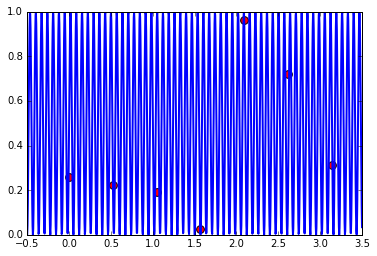

In [14]:
interact(fitting, k=(1,100));


In [23]:
from matplotlib import animation, rc



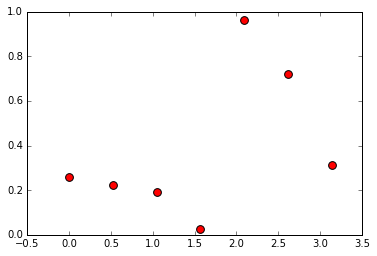

In [24]:
rc('animation', html='html5')
fig, ax = plt.subplots()
ax.set_xlim((-0.5,3.5))
ax.set_ylim((0, 1))

ax.scatter(x0,y0,s=60,c='r')
line, = ax.plot([], [], lw=2)


In [25]:
def init():
    line.set_data([], [])
    return (line,)
def animate(k):
    
    y = 0.5*np.sin(k*x)+0.5
    line.set_data(x, y)
    return (line,)


In [26]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)



In [27]:
anim



RuntimeError: No MovieWriters available!

In [22]:
print(animation.writers.list())


[]
